<a id='Cleaning'></a>
<table style="width:100%" align="center">
  <tr>
    <th>
<img src="https://www.sendiancreations.com/ar/wp-content/uploads/2019/05/opening.gif" width="300px" align="center"> </th>
<th> <h1>Automatic resignation month prediction  by department</h1></th>


      

 # To use this Report make sure that :
 ## 1.the data of starting month and end month must be in one of the 2 formats .xlsx or .Csv
 ## 2.the shape of the data in the file must be like this 
 
 <img src="input.png" width="300px" align="center">
 
 
 ## 3.you can generate the month in excel using the month function.
 
 
 # 🙧 🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨 🙤




# 
 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as wg
import re
import os
from os import listdir
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
plt.style.use('ggplot') #just for visualization 




In [2]:
# Choose the file of Historical data to open

files_list =[i for i in listdir() if re.findall('xlsx',i) or re.findall('csv',i)]
func=''
def open_file(file_n=''):
    typ=file_n[-1]
    func_list={"x":"df=pd.read_excel('","v":"df=pd.read_csv('"}
    global func
    func=func_list.get(typ)+file_n+"')"
  
    
    return  func

wg.interact(open_file,file_n=files_list);

interactive(children=(Dropdown(description='file_n', options=('resign.xlsx',), value='resign.xlsx'), Output())…

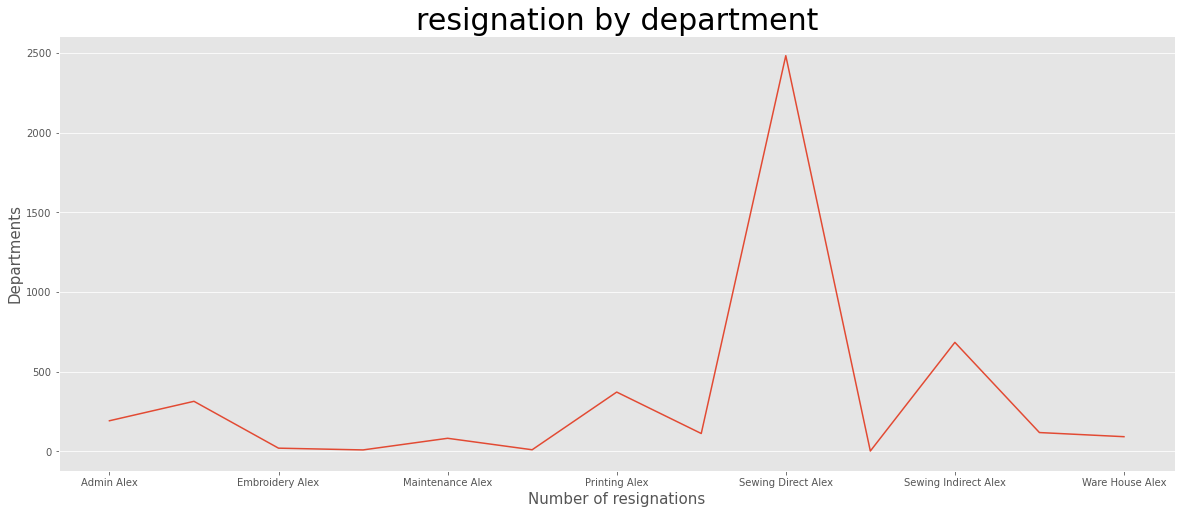

In [3]:
exec(func)
df_=pd.get_dummies(df.iloc[:,0])
df_.sum().plot(figsize=[20,8]);
plt.title('resignation by department', {'fontsize': 30})
plt.xlabel('Number of resignations',{'fontsize': 15})
plt.ylabel('Departments',{'fontsize': 15})
plt.grid( axis='x')
plt.show();

# 🙧 🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨 🙤




# 

In [4]:
data=pd.concat([df,df_],axis='columns')
data.drop(data.columns[0],axis=1,inplace=True)
y=data[data.columns[1]]
data.drop(data.columns[1],axis=1,inplace=True)
x=data

In [5]:
#prepair the training and testing parts then fit the model to it
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.27,random_state=123,stratify=y)
knn= KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [6]:
#Check the accurecy of predection
print('The accurecy of the Machine learning model is : ',str(format(knn.score(x_test,y_test),'.2%')))

The accurecy of the Machine learning model is :  17.15%


In [7]:
_=data.iloc[0:1].melt(id_vars=data.columns[0])
_=_[_.columns[1]]
_=pd.DataFrame(_.values.repeat(12))
_.reset_index(inplace=True)
_.rename(columns = {'index':'start_month',0:'department'},inplace=True)

# repeating month list in the dataframe start date col
list_ = [1,2,3,4,5,6,7,8,9,10,11,12]
ser = list_ * int(len(_)/len(list_))
_['start_month'] = ser + list_[:len(_)-len(ser)]
pred=pd.get_dummies(_.iloc[:,1])

In [8]:
pred=pd.concat([_,pred],axis='columns')
pred.drop(pred.columns[1],axis=1,inplace=True)
_['expected_end']=knn.predict(pred)
_.to_excel('expected resigning date by accurecy'+str(format(knn.score(x_test,y_test),'.2%'))+'.xlsx')

C:\Users\ALX-LAP49\Anaconda3\lib\site-packages\sklearn\base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- start_month
Feature names seen at fit time, yet now missing:
- Start month

  warnings.warn(message, FutureWarning)
